# Pymaceuticals Inc.
---

### Analysis

-	Mouse l509 saw a the greatest reduction in tumor volume at the the 35 day timepoint measurement while undergoing the Capomulin treatment.
-	Mice undergoing the Capomulin treatment generally had a strong correlation between weight and tumor volme, with the correlation coefficient between weight and tumor volume being 0.84, which is considered high. 
-	Mice undergoing the Ramicane treatment saw the lowest variance in tumor volume, suggesting the treatment had the smallest impact on tumor volume over the course of time.
-	Mice undergoing Ketapril treatments saw the highest standard deviation in tumor volume at 8.27, suggesting there is a high variability in the effectiveness of the treatment.
-	The dataset did contain duplicate data which had to be omitted (Mouse ID “g989”) but the effects of omitting the duplicate ID are objectively negligible.
-	Infubinol contained one potential outlier in the tumor volume dataset.

 

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# I want to export a new CSV for validation in Excel
merged_data.to_csv('merged_data_csv.csv', index=False)

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice.
merged_data["Mouse ID"].nunique()

249

In [11]:
duplicated_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicated_mice_ids = np.array(list(set(duplicated_mice['Mouse ID'])))
print(duplicated_mice_ids)

['g989']


In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicated_mice_ids = np.array(list(set(duplicated_mice['Mouse ID'])))
print(duplicated_mice_ids)

['g989']


In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_data = merged_data.loc[merged_data['Mouse ID'].isin(duplicated_mice_ids)]
duplicated_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data[merged_data['Mouse ID'] != 'g989']
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [15]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
grouped_clean_data = clean_data.groupby("Drug Regimen")


In [17]:
mean_tumor_volume = grouped_clean_data["Tumor Volume (mm3)"].mean()
median_tumor_volume = grouped_clean_data["Tumor Volume (mm3)"].median()
tumor_volume_variance = grouped_clean_data["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = grouped_clean_data["Tumor Volume (mm3)"].std()
tumor_volume_std_error = grouped_clean_data["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

summary_data = {
        'Mean Tumor Volume': mean_tumor_volume,
        'Median Tumor Volume': median_tumor_volume,
        'Tumor Volume Variance': tumor_volume_variance,
        'Tumor Volume Std. Dev': tumor_volume_std_dev,
        'Tumor Volume Std. Error': tumor_volume_std_error,
}

summary_data_df = pd.DataFrame(summary_data)
summary_data_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_data_df = grouped_clean_data.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_data_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

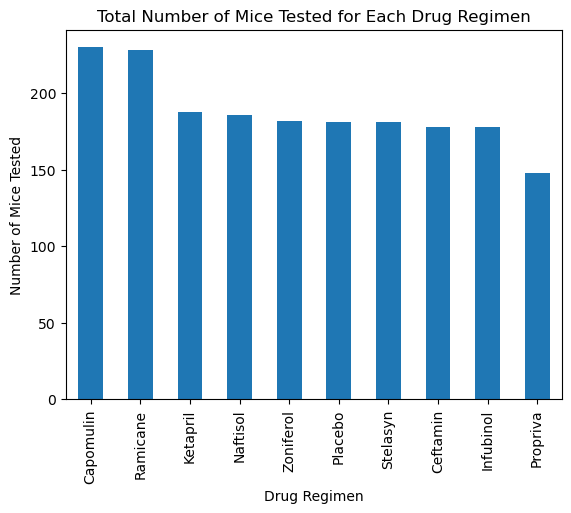

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Sum "total number of timepoints"
total_timepoints = grouped_clean_data["Drug Regimen"].count().sort_values(ascending=False)

# Show the bar plot using .plot
total_timepoints.plot.bar(
    xlabel="Drug Regimen",
    ylabel="Number of Mice Tested",
    title="Total Number of Mice Tested for Each Drug Regimen"
);


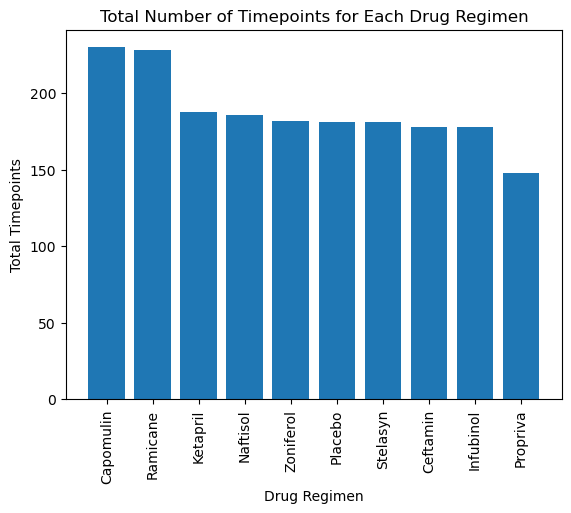

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using PyPlot.

total_timepoints_pyplot = grouped_clean_data["Drug Regimen"].count().sort_values(ascending=False)

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(total_timepoints_pyplot.index, total_timepoints_pyplot.values)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Total Timepoints")
ax.set_title("Total Number of Timepoints for Each Drug Regimen")

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Display the chart
plt.show()

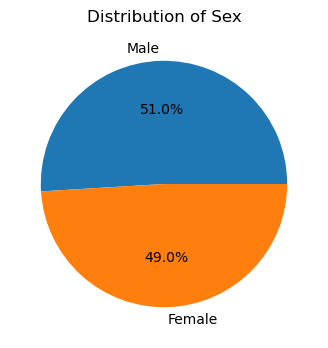

In [21]:

# Generate a pie plot showing the distribution of female versus male mice using Pandas


distribution_grouped = clean_data.groupby('Sex').size().sort_values(ascending=False)
distribution_grouped.plot(kind='pie', autopct='%1.1f%%', startangle=0, explode=[0, 0], figsize=(4,4), title="Distribution of Sex", label="");

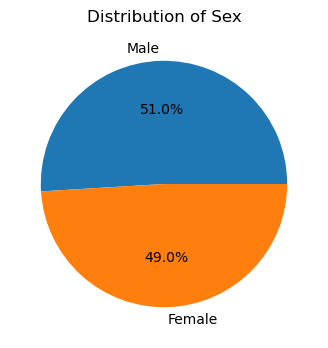

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group and sort the data then use it for the chart
distribution_grouped_plt = clean_data.groupby('Sex').size().sort_values(ascending=False)

# Create a pie chart using plt
plt.figure(figsize=(4, 4))
plt.pie(distribution_grouped_plt, labels=distribution_grouped.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_data[clean_data['Drug Regimen'].isin(treatments)]

# Start by getting the last (greatest) timepoint for each mouse

grouped_df = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = pd.merge(grouped_df, filtered_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_df

# Export merged data to validate
merged_df.to_csv('merged_df.csv', index=False)

In [24]:
final_tumor_volume = merged_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volume

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset
    tumor_vol_data.append(final_tumor_volume)
    
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
                  
    print(f"{treatment}:")
    print(f"The lower quartile of tumor volume is: {lowerq:.2f}")
    print(f"The upper quartile of tumor volume is: {upperq:.2f}")
    print(f"The interquartile range of tumor volume is: {iqr:.2f}")
    print(f"The median of tumor volume is: {quartiles[0.5]:.2f}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound:.2f} could be outliers.")
    print(f"Values above {upper_bound:.2f} could be outliers.")
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"Number of potential outliers: {len(outliers)}\n")
                  

Capomulin:
The lower quartile of tumor volume is: 32.38
The upper quartile of tumor volume is: 40.16
The interquartile range of tumor volume is: 7.78
The median of tumor volume is: 38.13
Values below 20.70 could be outliers.
Values above 51.83 could be outliers.
Number of potential outliers: 0

Ramicane:
The lower quartile of tumor volume is: 31.56
The upper quartile of tumor volume is: 40.66
The interquartile range of tumor volume is: 9.10
The median of tumor volume is: 36.56
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Number of potential outliers: 0

Infubinol:
The lower quartile of tumor volume is: 54.05
The upper quartile of tumor volume is: 65.53
The interquartile range of tumor volume is: 11.48
The median of tumor volume is: 60.17
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
Number of potential outliers: 1

Ceftamin:
The lower quartile of tumor volume is: 48.72
The upper quartile of tumor volume is: 64.30
The interqua

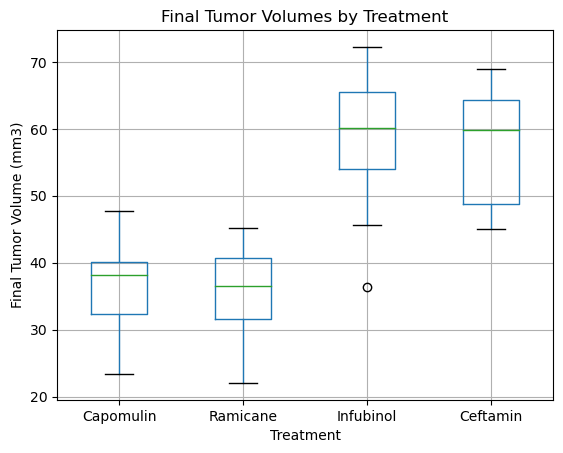

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Define treatment values
# Define final tumor volumes for the following dataframe
capomulin_final_tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')[['Timepoint', 'Tumor Volume (mm3)']].last()['Tumor Volume (mm3)']
ramicane_final_tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == 'Ramicane'].groupby('Mouse ID')[['Timepoint', 'Tumor Volume (mm3)']].last()['Tumor Volume (mm3)']
infubinol_final_tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == 'Infubinol'].groupby('Mouse ID')[['Timepoint', 'Tumor Volume (mm3)']].last()['Tumor Volume (mm3)']
ceftamin_final_tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == 'Ceftamin'].groupby('Mouse ID')[['Timepoint', 'Tumor Volume (mm3)']].last()['Tumor Volume (mm3)']

# Make a DataFrame with the final tumor volumes for each treatment
final_tumor_volumes = pd.DataFrame({'Capomulin': capomulin_final_tumor_vol,
                                    'Ramicane': ramicane_final_tumor_vol,
                                    'Infubinol': infubinol_final_tumor_vol,
                                    'Ceftamin': ceftamin_final_tumor_vol})

# Create the boxplot
final_tumor_volumes.boxplot()
plt.title('Final Tumor Volumes by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

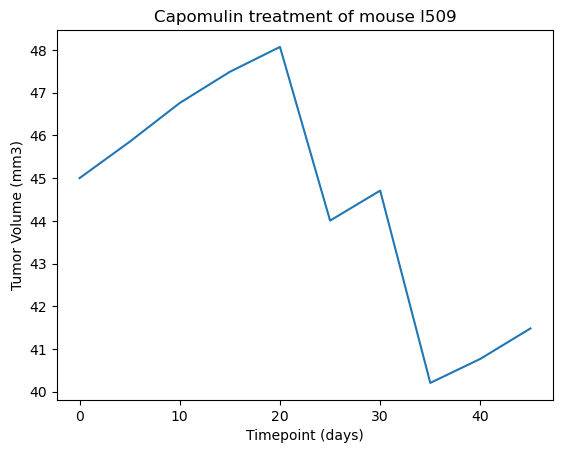

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin using clean_data

mouse_id = 'l509'

# Filter for mouse id by capomulin treatment
capomulin_data = clean_data[(clean_data['Mouse ID'] == mouse_id) & (clean_data['Drug Regimen'] == 'Capomulin')]

# Plot the line plot
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])

# Complete the line graph with labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.show()


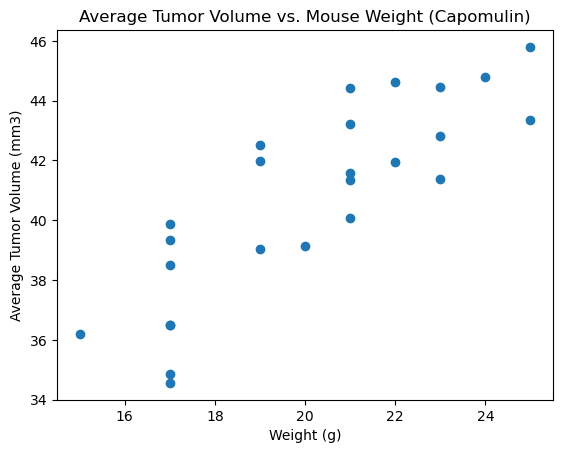

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Filter the clean_data DataFrame for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and mouse weight for each mouse
avg_data = capomulin_data.groupby('Mouse ID').mean()[['Tumor Volume (mm3)', 'Weight (g)']]

# Create a scatter plot of average tumor volume vs. mouse weight
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])


# Add axis labels and a title to the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin)')

# Show the plot
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694719
Slope: 0.9544396890241048
Intercept: 21.552160532685008
R-squared value: 0.7088568047708723


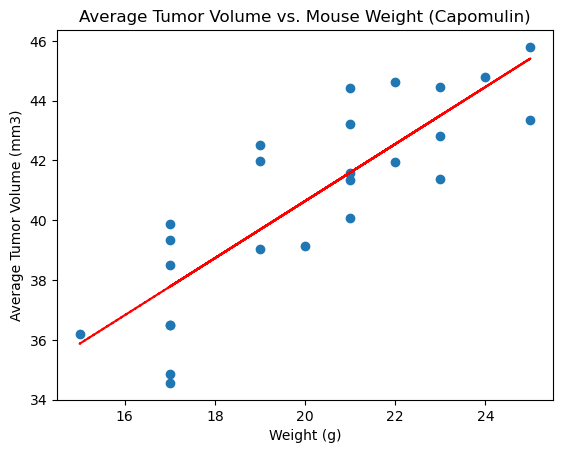

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Filter the clean_data DataFrame for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the avg tumor volume and mouse weight for each mouse
avg_data = capomulin_data.groupby('Mouse ID').mean()[['Tumor Volume (mm3)', 'Weight (g)']]

# Calculate the correlation coefficient between mouse weight and average tumor volume
corr_coef, p_value = st.pearsonr(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])
print('Correlation Coefficient:', corr_coef)

# Calculate the linear regression model
slope, intercept, rvalue, pvalue, stderr = st.linregress(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])

# Create a scatter plot of average tumor volume vs. mouse weight
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])

# Add a trendline to the plot using linear regression
z = np.polyfit(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'], 1)
p = np.poly1d(z)
plt.plot(avg_data['Weight (g)'], p(avg_data['Weight (g)']), "r--")

# Add axis labels and a title to the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin)')

# print coefficients and show plot
print('Slope:', slope)
print('Intercept:', intercept)
print('R-squared value:', rvalue ** 2)

plt.show()
